In [2]:
import numpy as np
from matplotlib import pyplot as plt
from functions import *
from functions_solutions import *
from scipy.ndimage import convolve
import maxflow

### Exam 2024

### Question 1) Filtering

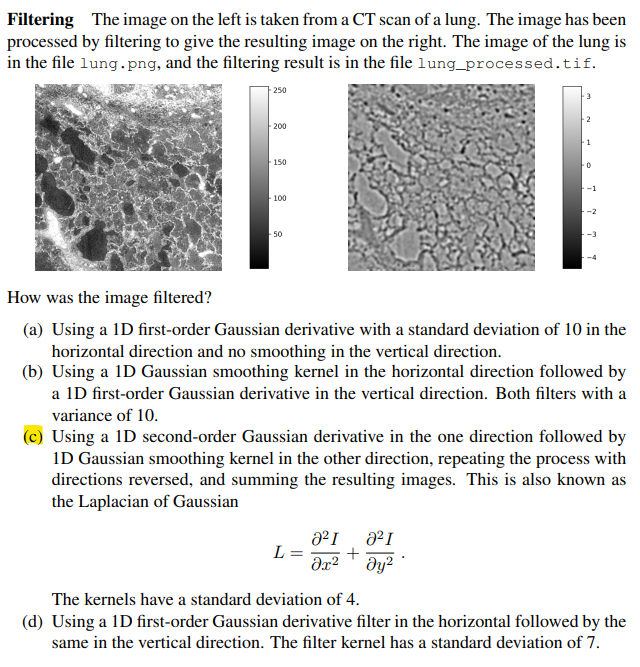

(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

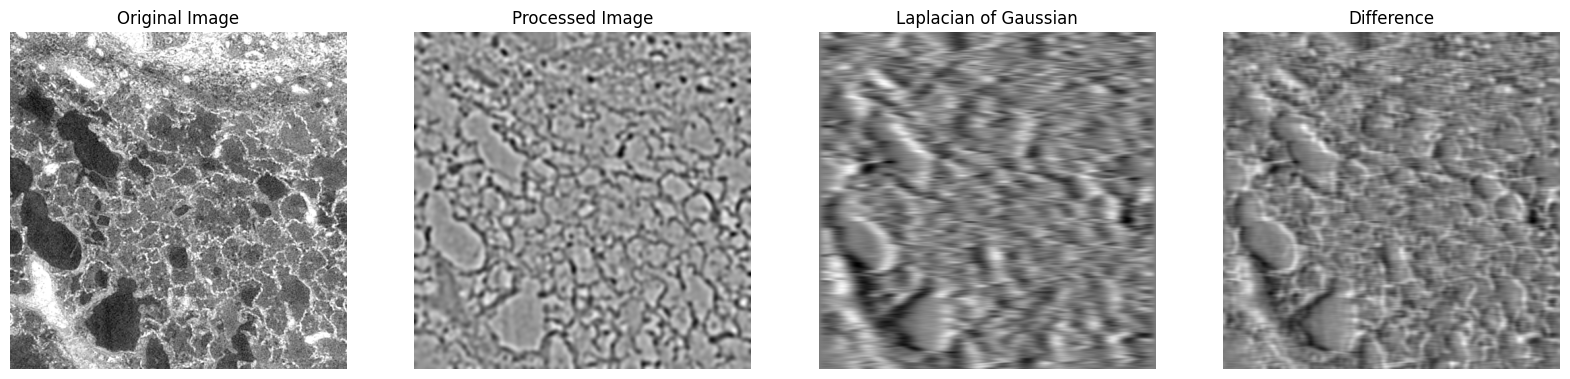

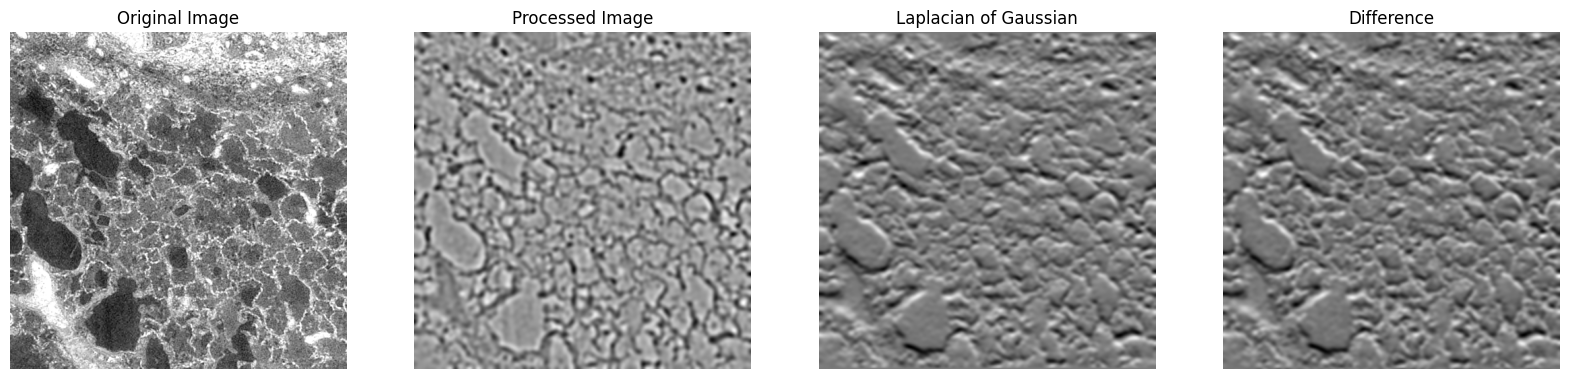

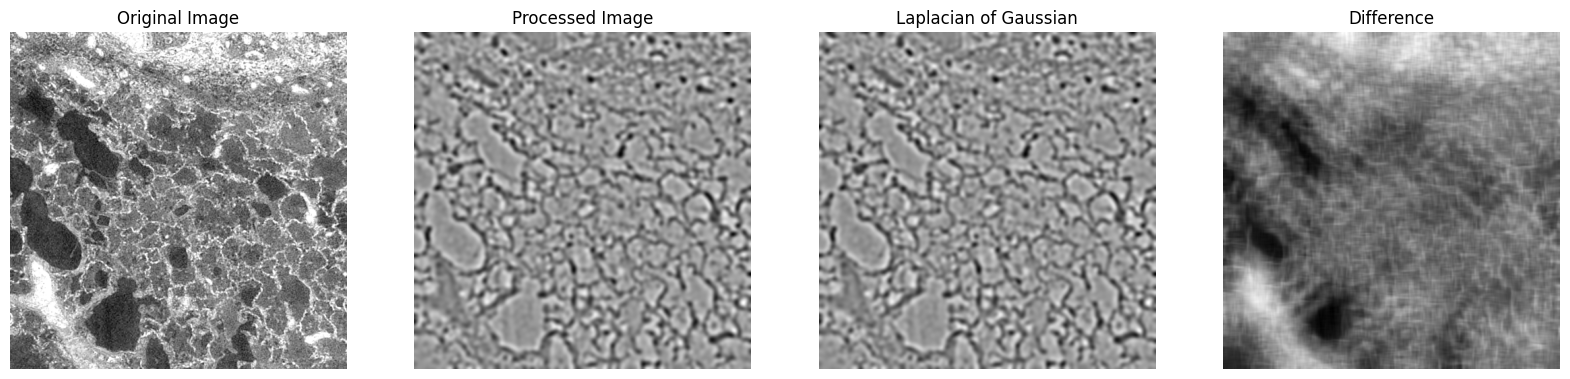

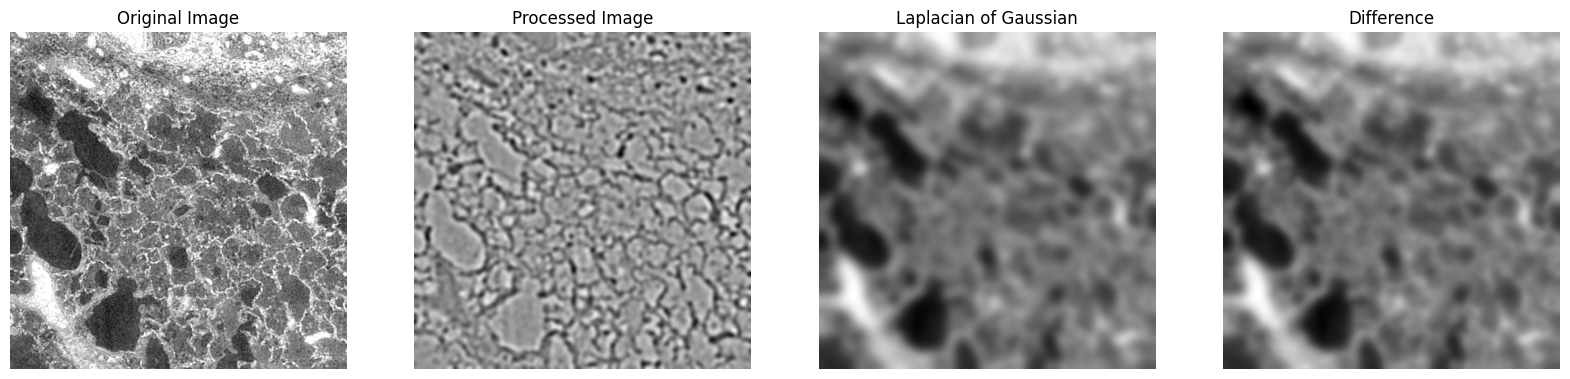

In [127]:
image = get_gray_image_float('exam_data\exam2024\lung\lung.png')*255
lung_processed = skimage.io.imread('exam_data/exam2024/lung/lung_processed.tif')


sigma = 10
g, dg, ddg, ddg =  get_gauss_derivatives(sigma**2, trunc=5)
dg = dg.reshape(1, -1) 
image1 = convolve(image, dg)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(lung_processed, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
ax[2].imshow(image1, cmap='gray')
ax[2].set_title('Laplacian of Gaussian')
ax[2].axis('off')
ax[3].imshow(image1 - lung_processed, cmap='gray')
ax[3].set_title('Difference')
ax[3].axis('off')


t = 10
g, dg, ddg, ddg =  get_gauss_derivatives(t, trunc=5)
image2 = separable_filtering(image, g, dg)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(lung_processed, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
ax[2].imshow(image2, cmap='gray')
ax[2].set_title('Laplacian of Gaussian')
ax[2].axis('off')
ax[3].imshow(image2 - lung_processed, cmap='gray')
ax[3].set_title('Difference')
ax[3].axis('off')

### Laplacian
L = Laplacian(image, t = 4**2, normalize=False)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(lung_processed, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
ax[2].imshow(L, cmap='gray')
ax[2].set_title('Laplacian of Gaussian')
ax[2].axis('off')
ax[3].imshow(L - lung_processed, cmap='gray')
ax[3].set_title('Difference')
ax[3].axis('off')


t = 7**2
g, dg, ddg, ddg =  get_gauss_derivatives(t, trunc=5)
image2 = separable_filtering(image, g, g)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(lung_processed, cmap='gray')
ax[1].set_title('Processed Image')
ax[1].axis('off')
ax[2].imshow(image2, cmap='gray')
ax[2].set_title('Laplacian of Gaussian')
ax[2].axis('off')
ax[3].imshow(image2 - lung_processed, cmap='gray')
ax[3].set_title('Difference')
ax[3].axis('off')


### Question 2) Image smoothness

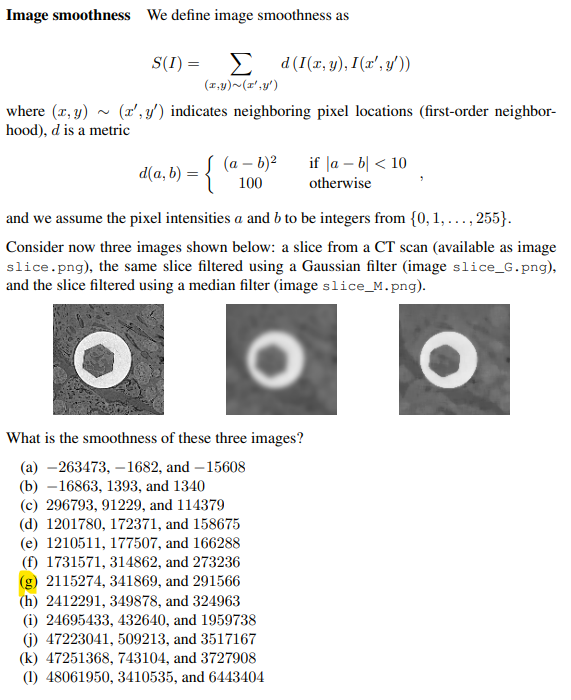

minimum value: 0, maximum value: 255
0 255
1052776 1062498
2115274


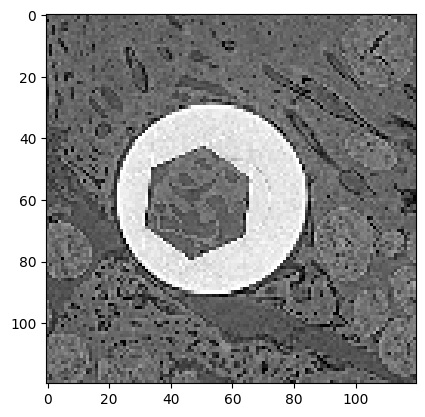

In [ ]:
image = get_gray_image('exam_data/exam2024/slice/slice.png').astype(int)
print(np.min(image), np.max(image))
plt.imshow(image, cmap='gray')
dx = image[:, 1:] - image[:, :-1]  # shape: (H, W-1)
dy = image[1:, :] - image[:-1, :]  # shape: (H-1, W)
dx_result = np.where(np.abs(dx) < 10, dx**2, 100)
dy_result = np.where(np.abs(dy) < 10, dy**2, 100)
value = np.sum(dx_result) + np.sum(dy_result)
print(np.sum(dx_result), np.sum(dy_result))
print(value)

### Question 3) Blob detection

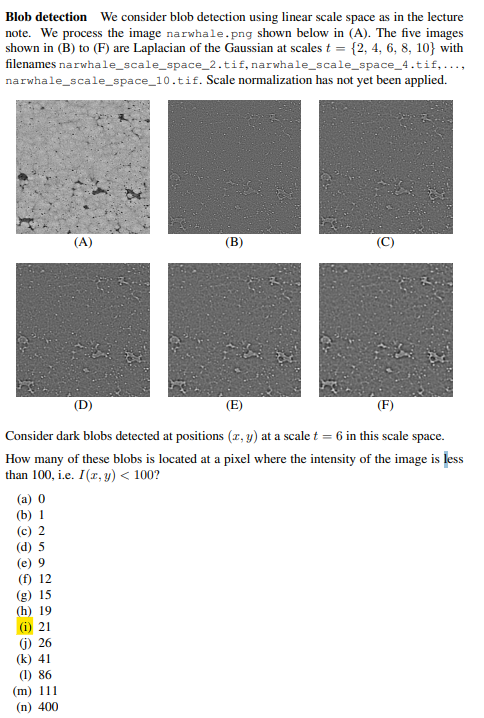

minimum value: 0, maximum value: 222
0 222
21


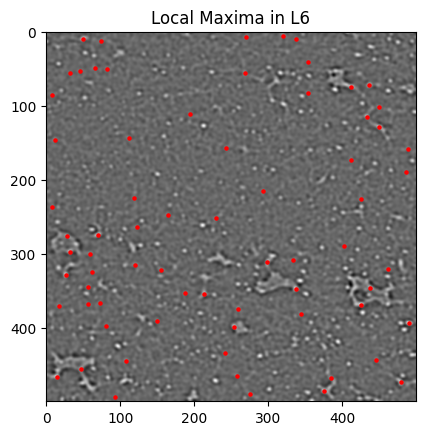

In [166]:
image = get_gray_image('exam_data/exam2024/narwhale/narwhale.png')
print(np.min(image), np.max(image))

L2 = skimage.io.imread('exam_data/exam2024/narwhale/narwhale_scale_space_2.tif')*2
L4 = skimage.io.imread('exam_data/exam2024/narwhale/narwhale_scale_space_4.tif')*4
L6 = skimage.io.imread('exam_data/exam2024/narwhale/narwhale_scale_space_6.tif')*6
L8 = skimage.io.imread('exam_data/exam2024/narwhale/narwhale_scale_space_8.tif')*8
L10 = skimage.io.imread('exam_data/exam2024/narwhale/narwhale_scale_space_10.tif')*10

L = np.stack([L2, L4, L6, L8, L10])

maxima = peak_local_max(L)
L6_maxima = maxima[maxima[:, 0] == 2]  # select rows where scale index is 2
L6_coords = L6_maxima[:, 1:]  # (row, col) positions of local maxima in L6

print(np.sum(image[L6_coords[:, 0], L6_coords[:, 1]] < 100))


plt.imshow(L6, cmap='gray')
plt.scatter(L6_coords[:, 1], L6_coords[:, 0], c='r', s=5)
plt.title("Local Maxima in L6")
plt.show()


### Question 4) Gaussian scale space

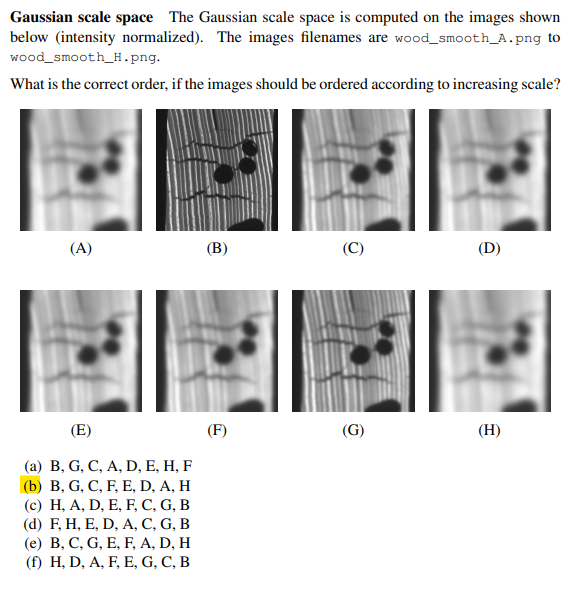

### Question 5) Feature clustering

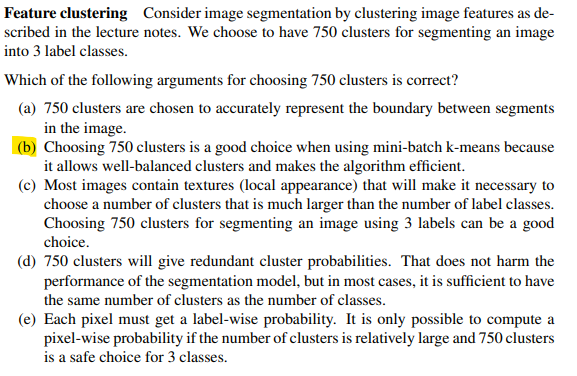

### Question 6) Feature-based segmentation

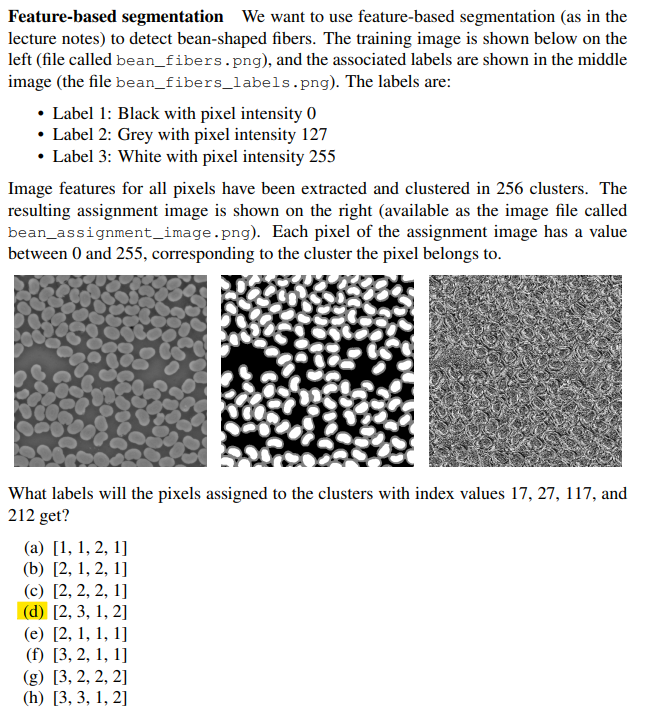

minimum value: 0, maximum value: 255
minimum value: 0, maximum value: 255
Unique for mask 17: [127 255]
The number of 127 labels: 840
The number of 255 labels: 40

Unique for mask 27: [127 255]
The number of 127 labels: 61
The number of 255 labels: 401

Unique for mask 117: [0]

Unique for mask 212: [  0 127]
The number of 0 labels: 0
The number of 127 labels: 840


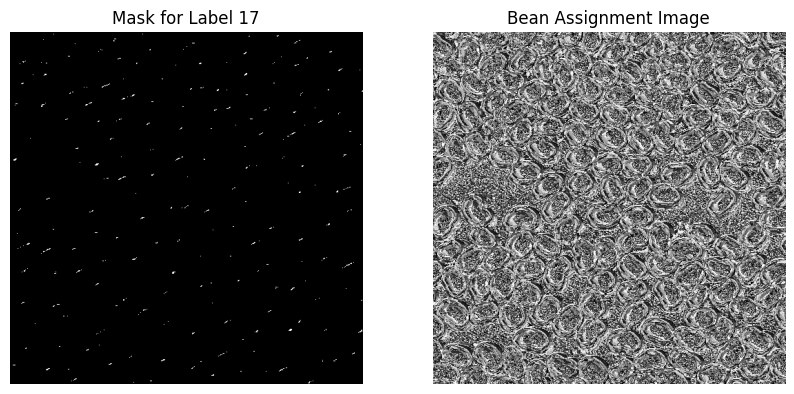

In [195]:
bean_assignment = get_gray_image('exam_data/exam2024/bean/bean_assignment_image.png').astype(int)
label = get_gray_image('exam_data/exam2024/bean/bean_fibers_labels.png')

# print(np.min(bean_assignment), np.max(bean_assignment))
# print(bean_assignment.dtype)

mask17 = bean_assignment == 17
mask27 = bean_assignment == 27
mask117 = bean_assignment == 117
mask212 = bean_assignment == 212

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(mask17, cmap='gray')
ax[0].set_title('Mask for Label 17')
ax[0].axis('off')
ax[1].imshow(bean_assignment, cmap='gray')
ax[1].set_title('Bean Assignment Image')
ax[1].axis('off')

print('Unique for mask 17:', np.unique(label[mask17]))
print('The number of 127 labels:', np.sum(label[mask17] == 127))
print('The number of 255 labels:', np.sum(label[mask17] == 255))
print()
print('Unique for mask 27:', np.unique(label[mask27]))
print('The number of 127 labels:', np.sum(label[mask27] == 127))
print('The number of 255 labels:', np.sum(label[mask27] == 255))
print()
print('Unique for mask 117:', np.unique(label[mask117]))
print()
print('Unique for mask 212:', np.unique(label[mask212]))
print('The number of 0 labels:', np.sum(label[mask17] == 0))
print('The number of 127 labels:', np.sum(label[mask17] == 127))



### Question 7) Matching blobs 

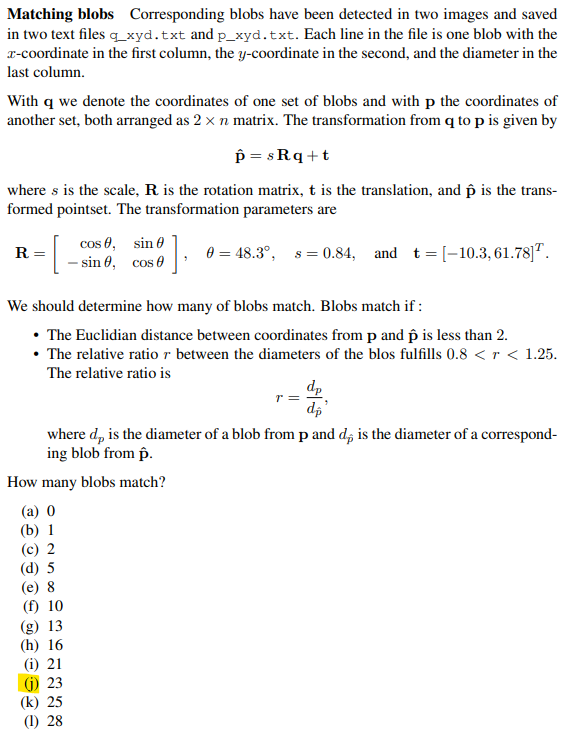

In [200]:
q_xyd = np.loadtxt('exam_data/exam2024/blobs/q_xyd.txt')
p_xyd = np.loadtxt('exam_data/exam2024/blobs/p_xyd.txt')
print(p_xyd[:3])
print(q_xyd.shape)
q = q_xyd[:, :2]
q_d = q_xyd[:, -1][:,None]

p = p_xyd[:, :2]
p_d = p_xyd[:, -1][:,None]
print(q.shape, p.shape)
print(p[:3])


theta = np.deg2rad(48.3)
R = np.array([[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]])
s = 0.84
t = np.array([-10.3, 61.78])[:, None]

p_hat = (s*R @ q.T + t).T

p_d_hat = s*q_d

idx_p_norm = np.linalg.norm(p_hat - p, axis=1) < 2
ratio = p_d / p_d_hat
idx_ratio = (ratio > 0.8) & (ratio < 1.25)
idx = idx_p_norm[:, None] & idx_ratio
print(np.sum(idx))

[[87.213 71.649 10.2  ]
 [56.386 74.275 11.653]
 [37.11   8.564  8.128]]
(28, 3)
(28, 2) (28, 2)
[[87.213 71.649]
 [56.386 74.275]
 [37.11   8.564]]
23


### Question 8) SIFT 

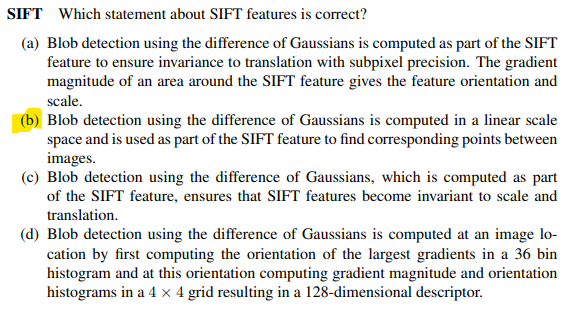

### Question 9) Segmentation energy

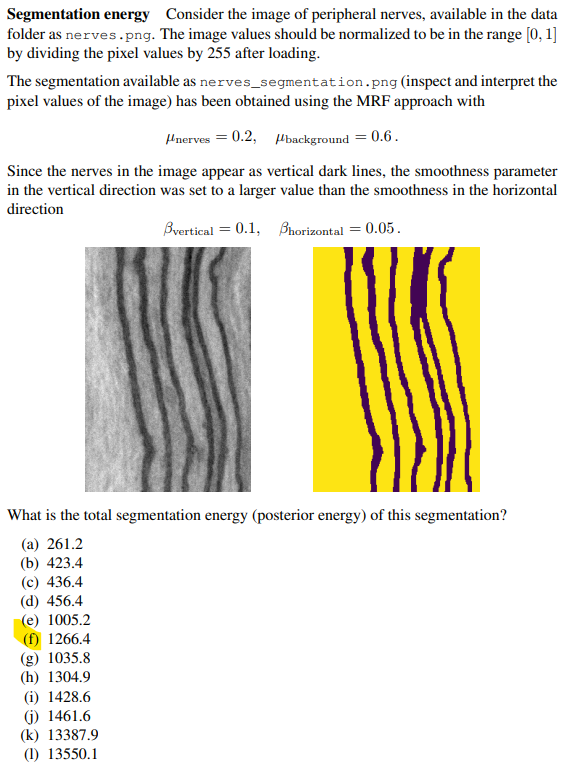

0.0 1.0
float64
0 1
int64
[0 1]
The likelihood energy term V1 is: 1005.1748096885813
The prior term V2 is: 261.20000000000005
The posterior energy term V1+V2 is: 1266.3748096885813


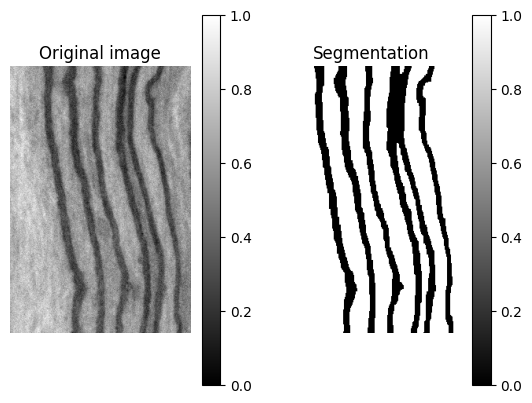

In [202]:
image = get_gray_image_float('exam_data/exam2024/nerves/nerves.png')
print(np.min(image), np.max(image))
print(image.dtype)

segmentation = get_gray_image_float('exam_data/exam2024/nerves/nerves_segmentation.png').astype(int)
print(np.min(segmentation), np.max(segmentation))
print(segmentation.dtype)
print(np.unique(segmentation))

plt.subplot(1, 2, 1)
plt.title("Original image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title("Segmentation")
plt.imshow(segmentation, cmap='gray')
plt.axis('off')
plt.colorbar()

mu = {0: 0.2, 1:0.6}
b_vertical = 0.1
b_horizontal = 0.05

V1, V2 = compute_V1_and_V2(image, segmentation, mu, b_vertical, b_horizontal)


### Question 10) Parameter range

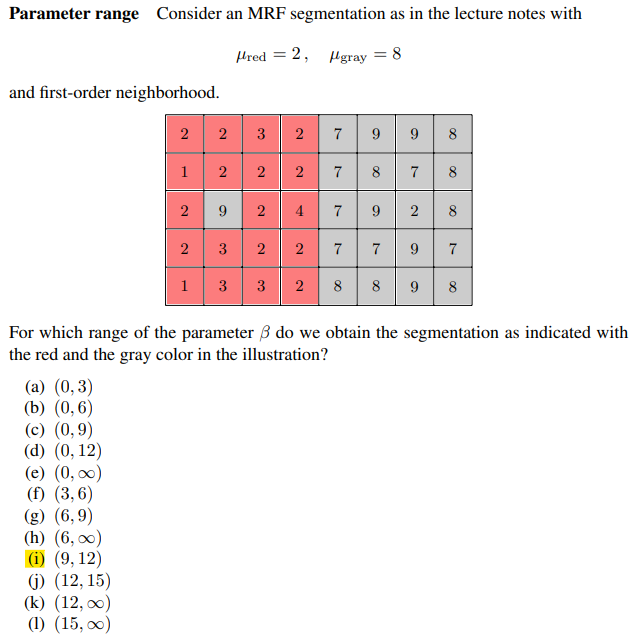

In [222]:
beta = 12
E_old = (9 - 8)**2 + beta*4
E_new = (9 - 2)**2

print(E_old, E_new)

image = np.array([
    [2, 3, 3, 2, 7, 9, 9, 8],
    [1, 2, 2, 2, 7, 8, 7, 8],
    [2, 9, 2, 4, 7, 9, 2, 8],
    [2, 3, 2, 2, 7, 7, 9, 7],
    [1, 3, 3, 2, 8, 8, 9, 8]
])
mu = [2, 8]
beta = 10
segmentation = markov_segmentation(image, mu, beta)
print(segmentation)

49 49
[[1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]
 [1 1 1 1 0 0 0 0]]


### Question 11) Energy evolution 

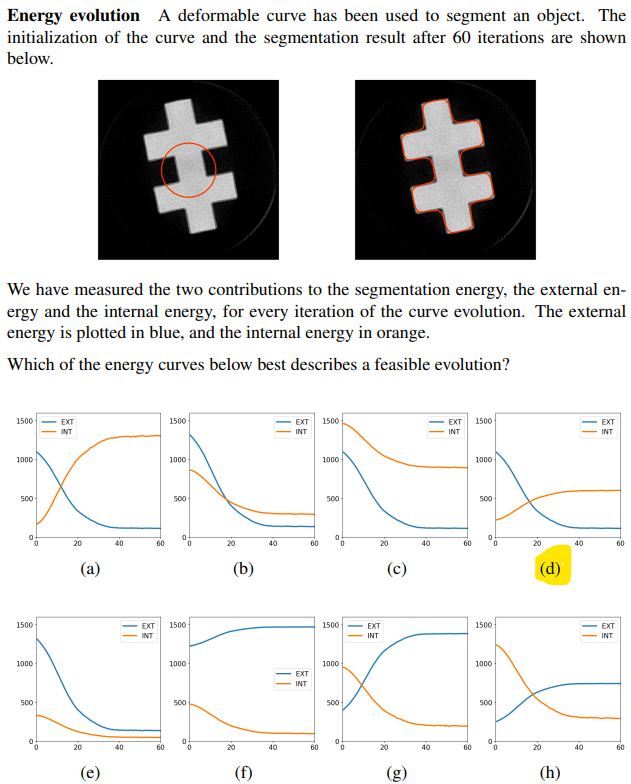

### Question 12)

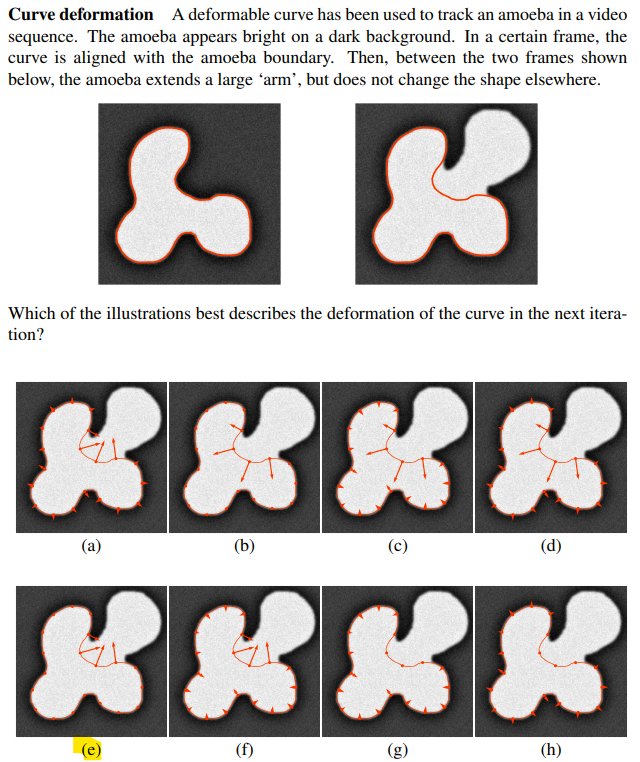

### Question 13) Segmentation cost


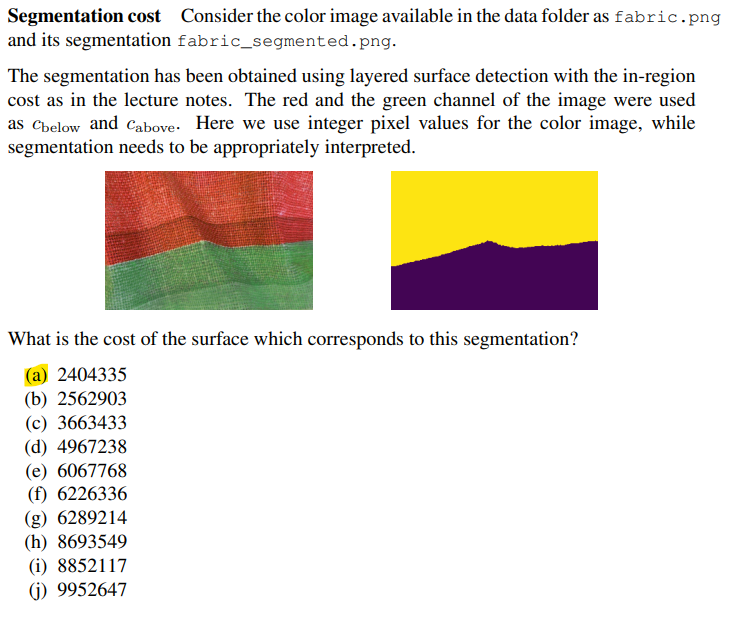

In [225]:
import numpy as np
import skimage.io

# Load images
img = skimage.io.imread('exam_data/exam2024/fabric/fabric.png')  # RGB image
seg = skimage.io.imread('exam_data/exam2024/fabric/fabric_segmentation.png')  # Segmentation labels

# Extract red and green channels
cbelow = img[:, :, 0].astype(np.int32)
cabove = img[:, :, 1].astype(np.int32)

# Create masks
mask_below = seg == 0
mask_above = seg == 1

# Apply costs
cost_below = np.sum(cbelow[mask_below])
cost_above = np.sum(cabove[mask_above])

# Total cost
total_cost = cost_below + cost_above

print(f"Total segmentation cost: {total_cost}")


Total segmentation cost: 2404335


### Question 14) Two-line detection

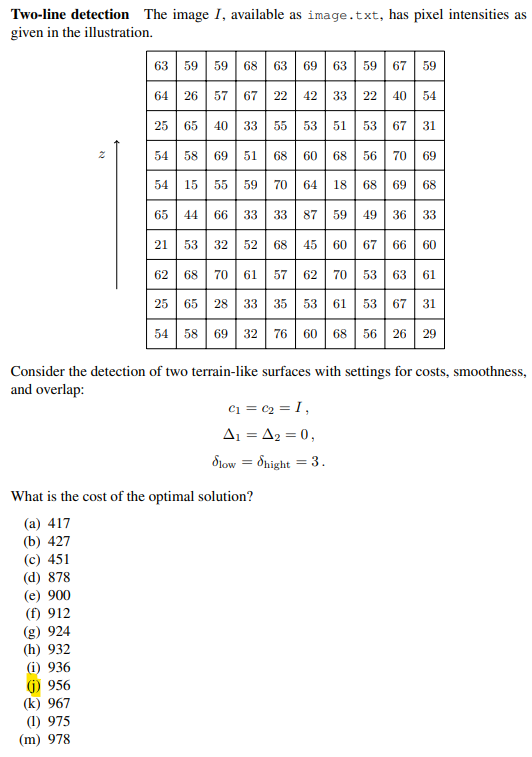

In [50]:
image = np.loadtxt('exam_data/exam2024/image/image.txt')
print(np.min(image), np.max(image)) 
print(image.dtype)
print(image.shape)

values = np.sum(image, axis=1)
print(values.shape)
print(values)

cost_list = []
for i in range(len(values)-3):
    print(values[i], values[i+3])
    cost = values[i] + values[i+3]
    cost_list.append(cost)

print('min cost:', np.min(cost_list))
    


15.0 87.0
float64
(10, 10)
(10,)
[629. 427. 473. 623. 540. 505. 524. 627. 451. 528.]
629.0 623.0
427.0 540.0
473.0 505.0
623.0 524.0
540.0 627.0
505.0 451.0
524.0 528.0
min cost: 956.0


### Question 15)

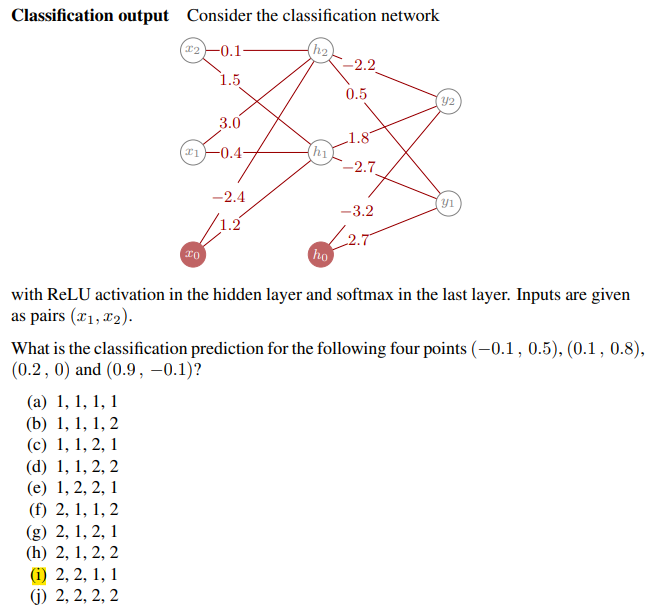

In [34]:
x1 = 0.9
x2 = -0.1

x0 = 1
h0 = 1

ReLU = lambda x: np.maximum(0, x)
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0, keepdims=True)

h2 = ReLU(0.1*x2 + 3.0*x1 - 2.4*x0)
h1 = ReLU(1.5*x2 + 0.4*x1 + 1.2*x0)

y2 = (-2.2*h2 + 1.8*h1 - 3.2*h0)
y1 = (0.5*h2 + -2.7*h1 + 2.7*h0)

y_hat = np.array([y1, y2])
y = softmax(y_hat)

print(y)

[0.58370462 0.41629538]


2, 2, 1, 1

### Question 16) MLP backpropagation 

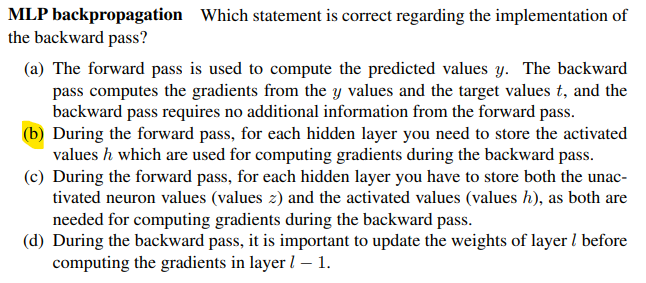

### Question 17) Gradients 

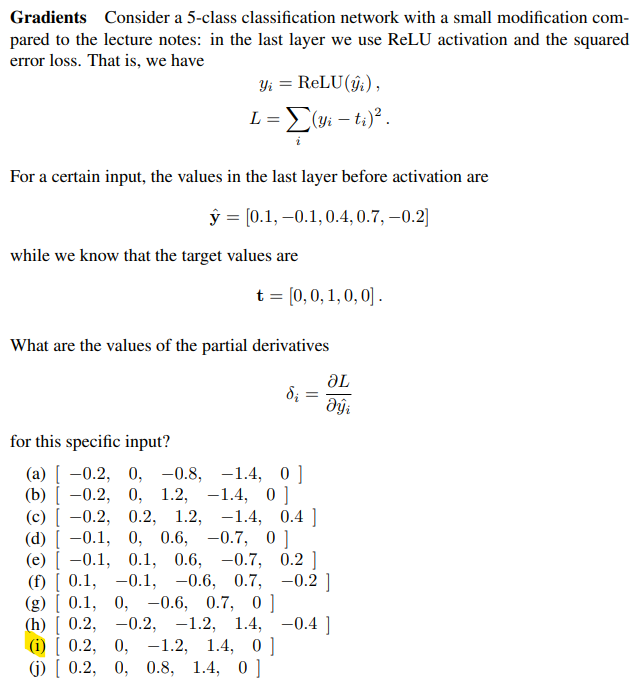

In [26]:
t =  np.array([0, 0, 1, 0, 0])[None, :]
y_hat = np.array([0.1, -0.1, 0.4, 0.7, -0.2])[None, :]
y = np.maximum(0, y_hat)
dy_dy_hat = y > 0
print('t', t)
print('y_hat', y_hat)
print('y', y)   

loss = 2*(y - t)*dy_dy_hat
print('loss', loss)

t [[0 0 1 0 0]]
y_hat [[ 0.1 -0.1  0.4  0.7 -0.2]]
y [[0.1 0.  0.4 0.7 0. ]]
loss [[ 0.2  0.  -1.2  1.4  0. ]]


### Question 18) Minibatches

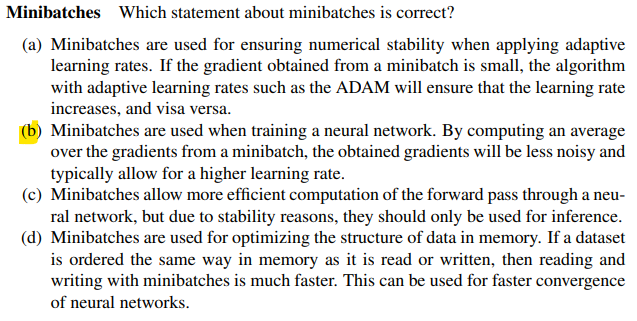

### Question 19) Network output

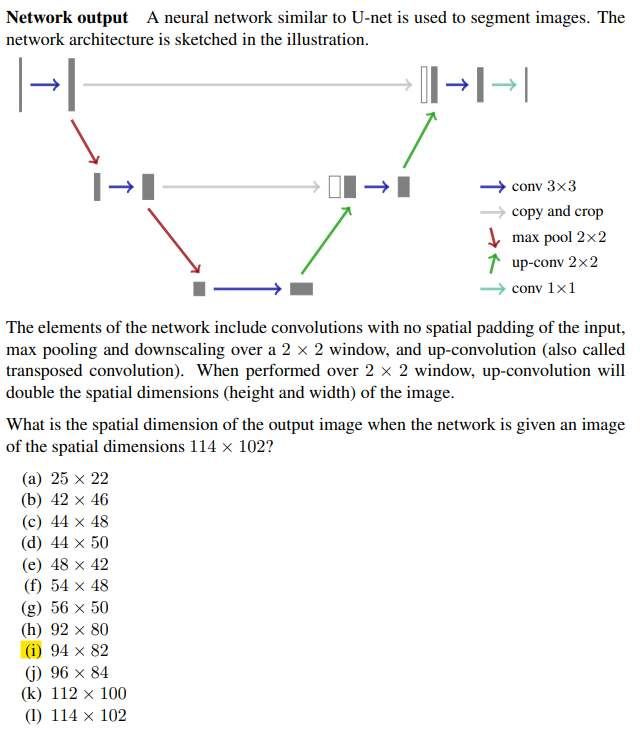

In [20]:
input_image = np.array([114, 102])
conv1 = (input_image - 2)/2
conv2 = (conv1 - 2)/2
conv3 = (conv2 - 2)
up1 = conv3*2 - 2
up2 = up1*2 - 2

print(up2)

[94. 82.]


### Question 20) Learnable parameters

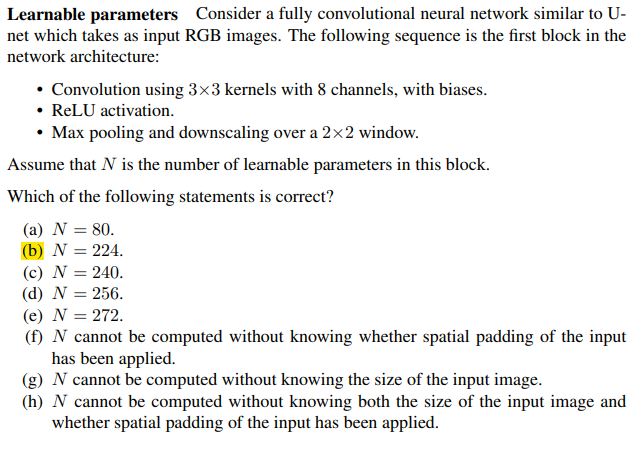

In [21]:
N = (3*3*3 + 1)*8
print(N)

224
